<a href="https://colab.research.google.com/github/joeyave/machine-learning-project2/blob/main/machine_learning_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Машинне навчання
## Лабораторна робота №2. Авельцев Йосип

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic_file_path = '/content/drive/My Drive/Colab Notebooks/train-project2.csv'
titanic_data = pd.read_csv(titanic_file_path)

### 1. Створити три різних класифікатори з гіперпараметрами по замовчуванню.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

titanic_model1 = KNeighborsClassifier()
titanic_model2 = DecisionTreeClassifier()
titanic_model3 = SVC()

### 2. Навчити ці класифікатори на усьому наборі даних і за можливості візуалізувати їх.
Після цього слід вручну створити тестовий набір даних з декількох об’єктів і одержати прогнози цільової ознаки за допомогою навчених класифікаторів.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Values to predict.
y = titanic_data.Survived

# Features.
X = titanic_data[titanic_data.columns[1:]]

titanic_model1.fit(X, y)
titanic_model2.fit(X, y)
titanic_model3.fit(X, y)

custom_X = pd.DataFrame([{
    "Pclass": 1.0, 
    "Age": 0.329064, 
    "SibSp": 0.333333, 
    "Parch": 0.0, 
    "Fare": 0.043975, 
    "Sex_male": 1, 
    "Embarked_Q": 0, 
    "Embarked_S": 1
    }])

print(titanic_model1.predict(custom_X))
print(titanic_model2.predict(custom_X))
print(titanic_model3.predict(custom_X))

[0]
[0]
[0]


### 3. Оцінити якість класифікації за допомогою техніки відкладеної вибірки.
Додатково вивести на екран матрицю помилок.

In [ ]:
from sklearn.metrics import mean_absolute_error, confusion_matrix, accuracy_score

# Split data into training and validation data, for both features and target.
# Supplying a numeric value to the random_state argument guarantees we get the 
# same split every time we run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

titanic_model1.fit(train_X, train_y)
titanic_model2.fit(train_X, train_y)
titanic_model3.fit(train_X, train_y)

val_predictions1 = titanic_model1.predict(val_X)
val_predictions2 = titanic_model2.predict(val_X)
val_predictions3 = titanic_model3.predict(val_X)

print("model 1:")
print(confusion_matrix(val_y, val_predictions1))
print(accuracy_score(val_y, val_predictions1))
print("\nmodel 2:")
print(confusion_matrix(val_y, val_predictions2))
print(accuracy_score(val_y, val_predictions1))
print("\nmodel 3:")
print(confusion_matrix(val_y, val_predictions3))
print(accuracy_score(val_y, val_predictions1))


model 1:
[[109  15]
 [ 22  59]]
0.8195121951219512

model 2:
[[112  12]
 [ 26  55]]
0.8195121951219512

model 3:
[[110  14]
 [ 25  56]]
0.8195121951219512


### 4. Оцінити якість класифікації, використовуючи техніку ковзного контролю.

In [ ]:
# Returns: Array of scores of the estimator for each run of the cross validation.
from sklearn.model_selection import cross_val_score

print("model 1:")
print(cross_val_score(titanic_model1, X, y))
print("\nmodel 2:")
print(cross_val_score(titanic_model2, X, y))
print("\nmodel 3:")
print(cross_val_score(titanic_model3, X, y))

model 1:
[0.75609756 0.77439024 0.83536585 0.80981595 0.79754601]

model 2:
[0.70121951 0.76829268 0.81097561 0.76687117 0.81595092]

model 3:
[0.82926829 0.80487805 0.80487805 0.79754601 0.82822086]


### 5. Спробувати створити класифікатори з іншими гіперпараметрами та оцінити якість їх прогнозів.
На цьому етапі слід спробувати налаштувати декілька найважливіших гіперпараметрів, підібравши такі їх значення, за яких якість класифікації найвища. Корисною для цього може виявитися крива валідації.

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import validation_curve

# Ideally, we would want both the validation curve and the training curve to look as similar as possible.
# If both scores are low, the model is likely to be underfitting.
# If the training curve reaches a high score relatively quickly and the validation curve is lagging behind, the model is overfitting.
# We would want the value of the parameter where the training and validation curves are closest to each other.

def draw_plot(title, xlabel, train_score, val_score):
  mean_train_score = np.mean(train_score, axis = 1) 
  std_train_score = np.std(train_score, axis = 1) 

  mean_val_score = np.mean(val_score, axis = 1) 
  std_val_score = np.std(val_score, axis = 1) 

  # Plot mean accuracy scores.
  plt.plot(parameter_range, mean_train_score, label = "Training Score", color = 'b') 
  plt.plot(parameter_range, mean_val_score, label = "Cross Validation Score", color = 'g') 
    
  # Creating the plot.
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

#### KNN Classifier `titanic_model1`

In [ ]:
titanic_model1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

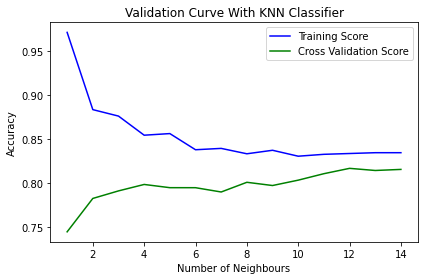

In [ ]:
parameter_range = np.arange(1, 15, 1) 

# Calculate accuracy on training and test set.
train_score1, val_score1 = validation_curve(titanic_model1, X, y, 
                                           param_name = "n_neighbors", 
                                           param_range = parameter_range, 
                                           scoring = "accuracy")

draw_plot("Validation Curve With KNN Classifier", "Number of Neighbours", train_score1, val_score1)

In [ ]:
titanic_model1.set_params(n_neighbors=12)
titanic_model1.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

#### Decision Tree Classifier `titanic_model2`

In [ ]:
titanic_model2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

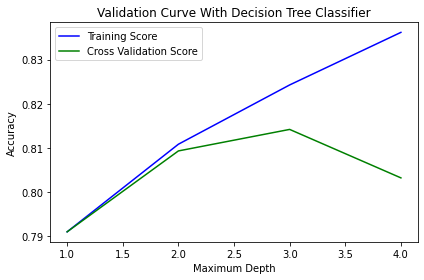

In [ ]:
parameter_range = np.arange(1, 5, 1) 

# Calculate accuracy on training and test set.
train_score2, val_score2 = validation_curve(titanic_model2, X, y, 
                                           param_name = "max_depth", 
                                           param_range = parameter_range, 
                                           scoring = "accuracy")

draw_plot("Validation Curve With Decision Tree Classifier", "Maximum Depth", train_score2, val_score2)

In [ ]:
titanic_model2.set_params(max_depth=1)
titanic_model2.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### SVC Classifier `titanic_model3`

In [ ]:
titanic_model3.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

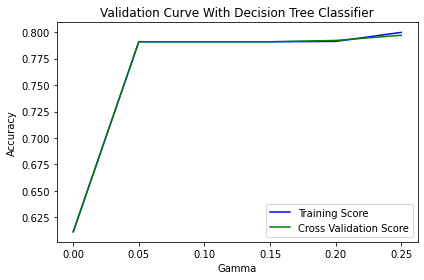

In [ ]:
parameter_range = np.arange(0, 0.3, 0.05) 

# Calculate accuracy on training and test set.
train_score3, val_score3 = validation_curve(titanic_model3, X, y, 
                                           param_name = "gamma", 
                                           param_range = parameter_range, 
                                           scoring = "accuracy")

draw_plot("Validation Curve With Decision Tree Classifier", "Gamma", train_score3, val_score3)

In [ ]:
titanic_model3.set_params(gamma=0.2)
titanic_model3.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 6. Здійснити автоматичний підбір гіперпараметрів для кожного класифікатора за допомогою вбудованих засобів бібліотеки scikit-learn.
За яких гіперпараметрів (підібраних вами вручну або знайдених автоматично) якість класифікації вища?

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': np.arange(1, 15, 1)
}

titanic_model1_grid = GridSearchCV(titanic_model1, params)
titanic_model1_grid.fit(train_X, train_y)

print("model1 auto params:")
print(titanic_model1_grid.best_params_)
print(titanic_model1_grid.best_score_)

print("\nmodel1 manual params:")
val_predictions1 = titanic_model1.predict(val_X)
print(titanic_model1.get_params())
print(accuracy_score(val_y, val_predictions1))

params = {
    'max_depth': np.arange(1, 5, 1)
}

titanic_model2_grid = GridSearchCV(titanic_model2, params)
titanic_model2_grid.fit(train_X, train_y)

print("\nmodel2 auto params:")
print(titanic_model2_grid.best_params_)
print(titanic_model2_grid.best_score_)

print("\nmodel2 manual params:")
val_predictions2 = titanic_model2.predict(val_X)
print(titanic_model2.get_params())
print(accuracy_score(val_y, val_predictions2))

params = {
    'gamma': np.arange(0, 0.3, 0.05)
}

titanic_model3_grid = GridSearchCV(titanic_model3, params)
titanic_model3_grid.fit(train_X, train_y)

print("\nmodel3 auto params:")
print(titanic_model3_grid.best_params_)
print(titanic_model3_grid.best_score_)

print("\nmodel3 manual params:")
val_predictions3 = titanic_model1.predict(val_X)
print(titanic_model3.get_params())
print(accuracy_score(val_y, val_predictions1))

model1 auto params:
{'n_neighbors': 13}
0.8058376649340264

model1 manual params:
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 12, 'p': 2, 'weights': 'uniform'}
0.8390243902439024

model2 auto params:
{'max_depth': 2}
0.8075036652005865

model2 manual params:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
0.7853658536585366

model3 auto params:
{'gamma': 0.05}
0.7928295348527257

model3 manual params:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.2, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True

### 7. Для кожного класифікатора з гіперпараметрами, які ви вважаєте оптимальними, побудувати криву навчання. 
Виходячи з її вигляду, слід відповісти на питання: чи не перенавчений класифікатор? чи достатній обсяг навчальної вибірки? Якщо крива навчання свідчить про перенавчання класифікатора, то слід повернутися до пункту 5 і підібрати інші гіперпараметри.

In [ ]:
# Determines cross-validated training and test scores 
# for different training set sizes.
from sklearn.model_selection import learning_curve

def draw_plot(title, train_sizes, train_scores, val_scores):
  train_scores_mean = np.mean(train_scores, axis = 1) 
  val_scores_mean = np.mean(val_scores, axis = 1) 

  # Plot mean accuracy scores.
  plt.plot(train_sizes, train_scores_mean, label = "Training Score", color = 'b') 
  plt.plot(train_sizes, val_scores_mean, label = "Cross Validation Score", color = 'g') 
    
  # Creating the plot.
  plt.title(title)
  plt.xlabel("Training examples")
  plt.ylabel("Accuracy")
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.show()

#### KNN Classifier `titanic_model1`

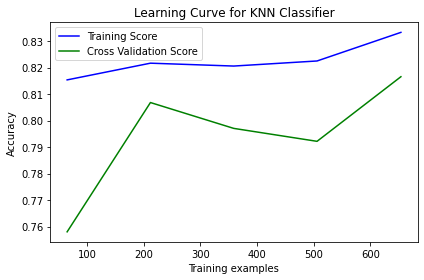

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(titanic_model1, X, y)
draw_plot("Learning Curve for KNN Classifier", train_sizes, train_scores, val_scores)

#### Decision Tree Classifier `titanic_model2`

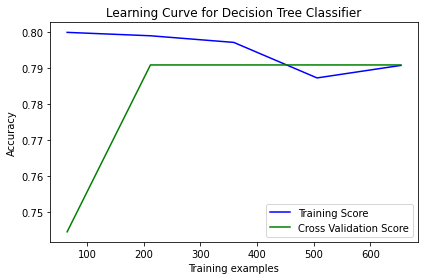

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(titanic_model2, X, y)
draw_plot("Learning Curve for Decision Tree Classifier", train_sizes, train_scores, val_scores)

#### SVC Classifier `titanic_model3`

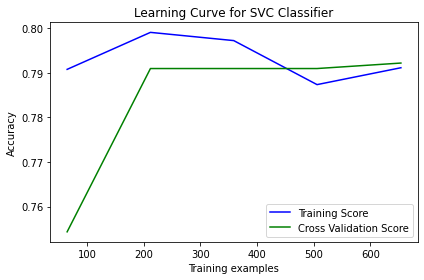

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(titanic_model3, X, y)
draw_plot("Learning Curve for SVC Classifier", train_sizes, train_scores, val_scores)